# Линейное программирование

Практика решения задач оптимизации.

## Описание

Линейное программирование – это набор математических и вычислительных инструментов, позволяющих найти конкретное решение системы, которое соответствует максимуму или минимуму какой-либо другой линейной функции.

Базовый метод решения задач линейного программирования называется симплекс-методом, другой популярный подход – метод внутренней точки.

### Пример 1

Найти такие x и y, чтобы выполнялись красное, синее и желтое неравенства, а также ограничения x ≥ 0 и y ≥ 0. При этом наше решение должно соответствовать максимально возможному значению z.

Независимые переменные, которые нам нужно найти (x и y) называют переменными решения (decision variables).  
Функция, которую необходимо максимизировать или минимизировать (z) – это целевая функция (objective function), функция стоимости (cost function) или просто цель (goal).  
Неравенства (или уравнения), которым необходимо удовлетворять, называются ограничениями (inequality constraints или equality constraints для обычных уравнений).

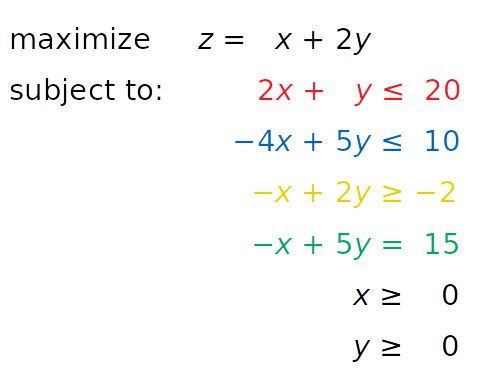

Визуализируем:
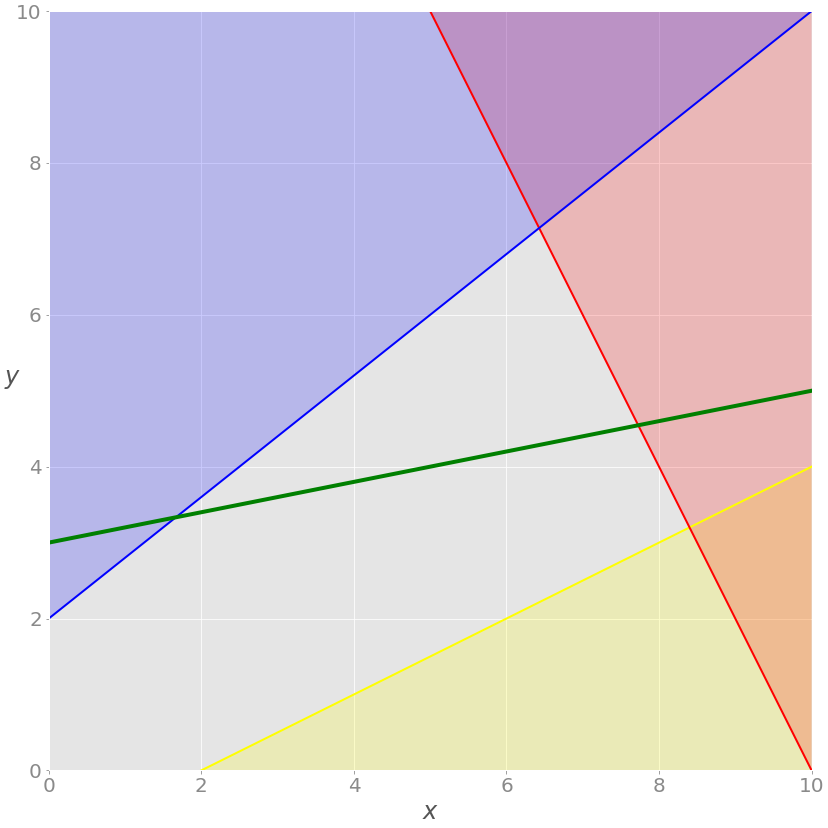

Каждая точка серой области удовлетворяет всем ограничениям и является потенциальным решением задачи. Эта область называется областью допустимых решений (feasible region), а ее точки – допустимыми решениями (feasible solutions).

Нужно максимизировать $z$. Решение, соответствующее максимальному значению $z$, называют оптимальным решением.

Функция $z$ линейна. Оптимальное решение должно находиться в одной из вершин области допустимых решений. Иногда весь край допустимой области или даже вся область может соответствовать одному и тому же значению $z$. В этом случае есть много оптимальных решений.

Когда ни одно решение не может удовлетворить все ограничения сразу, задача в рамках линейного программирования неразрешима.

### Решние

linprog() решает только задачи минимизации (не максимизации) и не допускает ограничений-неравенств со знаком больше или равно (≥). Чтобы обойти эти проблемы, необходимо изменить описание задачи перед запуском оптимизации:
- вместо максимизации z = x + 2y минимизируем отрицательное значение (−z = −x − 2y);
- вместо знака ≥ можно умножить «желтое» неравенство на -1 и получить противоположный знак.

In [1]:
# !python -m pip install -U scipy pulp
# !pulptest

In [2]:
# Импортируем библеотеку
from scipy.optimize import linprog

In [3]:
# Определяем входные значения

# Создание списоков:
obj = [-1, -2]
#      ─┬  ─┬
#       │   └┤ коэффициент для y
#       └────┤ коэффициент для x

lhs_ineq = [
    [2, 1],  # левая сторона красного неравенства
    [-4, 5],  # левая сторона синего неравенства
    [1, -2]
]  # левая сторона желтого неравенства

rhs_ineq = [
    20,  # правая сторона красного неравенства
    10,  # правая сторона синего неравенства
    2
]  # правая сторона желтого неравенства

lhs_eq = [[-1, 5]]  # левая сторона зеленого равенства
rhs_eq = [15]  # правая сторона зеленого равенства

- obj содержит коэффициенты целевой функции,
- lhs_ineq и rhs_ineq содержат коэффициенты из ограничений-неравенств,
- lhs_eq и rhs_eq содержат коэффициенты из ограничивающего уравнения.

In [4]:
# Определение границ каждой переменной (в данном случае они находятся между нулем и положительной бесконечностью):

bnd = [(0, float("inf")),  # Границы x
       (0, float("inf"))]  # Границы y

In [5]:
# Находим решение
opt = linprog(c=obj,
              A_ub=lhs_ineq,
              b_ub=rhs_ineq,
              A_eq=lhs_eq,
              b_eq=rhs_eq,
              bounds=bnd,
              method="revised simplex")

Параметр $c$ относится к коэффициентам из целевой функции. A_ub и b_ub соответственно связаны с коэффициентами из левой и правой частей ограничений-неравенств. Точно так же A_eq и b_eq относятся к ограничениям уравнений. Параметр bounds служит для указания нижней и верхней границ переменных решения.

Параметр method определяет используемый алгоритм линейного программирования. Доступны три варианта:

по умолчанию используется метод внутренней точки: method = "inner-point",
измененный двухфазный симплекс-метод method="revised simplex"
симплекс-метод method="simplex"

In [6]:
opt

     con: array([0.])
     fun: -16.818181818181817
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([ 0.        , 18.18181818,  3.36363636])
  status: 0
 success: True
       x: array([7.72727273, 4.54545455])

linprog() возвращает структуру данных со следующими атрибутами:

.con – остатки ограничения-равенства;  
.fun – оптимальное значение целевой функции (если найдено);  
.message – словесный статус решения; 
.nit – количество итераций, необходимых для завершения расчета;  
.slack – значения так называемых дополнительных переменных – разниц между значениями левой и правой сторонами ограничений;  
.status – целое число от 0 до 4, отражающих результат решения: например, 0, когда было найдено оптимальное решение;  
.success – логическое значение, показывающее, найдено ли оптимальное решение;  
.x – массив NumPy, содержащий оптимальные значения переменных решения.  

In [7]:
# Если удалить параметры зеленого уравнения A_eq и b_eq из вызова linprog(), получим следующий результат:

opt = linprog(c=obj,
              A_ub=lhs_ineq,
              b_ub=rhs_ineq,
              bounds=bnd,
              method="revised simplex")
opt.x

array([6.42857143, 7.14285714])

### Пример 2

Фабрика производит четыре различных продукта, ежедневное количество первого продукта составляет x_1, второго продукта – x_2 и т. д.  

Цель – определить максимальную прибыль ежедневного объема производства для каждого продукта с учетом следующих условий:

- прибыль (profit) на единицу продукта составляет 20, 12, 40 и 25 долларов для каждого из четырех продуктов соответственно;
- из-за нехватки рабочей силы (manpower) общее количество единиц, производимых в день, не может превышать 50;
- на каждую единицу 1-го продукта расходуется 3 единицы сырья A;
- каждая единица 2-го продукта требует 2 единиц сырья A и 1 единицы сырья B;
- каждой единице 3-го продукта требуется 1 единица A и 2 единицы B;
- каждая единица 4-го продукта требует трех единиц B;
- из-за ограничений по транспортировке и хранению фабрика может потреблять до 100 единиц сырья A и 90 единиц B в день.

Математическую модель можно определить так:
    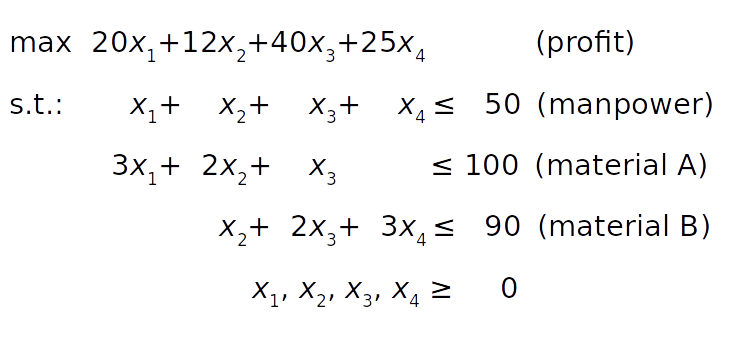
- целевая функция (profit) определяется в условии 1;
- ограничение рабочей силы следует из условия 2;
- ограничения на сырье A и B могут быть получены из условий 3 и 4 путем суммирования потребностей в сырье для каждого продукта;
- количество продуктов не может быть отрицательным.

### Решение

Извлекаем необходимые векторы и матрицу из задачи, и передаем их в качестве аргументов в linprog().

In [8]:
obj = [-20, -12, -40, -25]

lhs_ineq = [[1, 1, 1, 1],  # Рабочая сила
            [3, 2, 1, 0],  # Материал A
            [0, 1, 2, 3]]  # Материал B

rhs_ineq = [ 50,  # Рабочая сила
            100,  # Материал A
             90]  # Материал B

opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
              method="revised simplex")

opt

     con: array([], dtype=float64)
     fun: -1900.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 0., 40.,  0.])
  status: 0
 success: True
       x: array([ 5.,  0., 45.,  0.])

Максимальная прибыль составляет 1900 и соответствует x_1 = 5 и x_3 = 45. В данных условиях производить второй и четвертый продукты невыгодно.  
Результат позволяет сделать несколько интересных выводов:
- 3-й продукт приносит наибольшую прибыль;
- 1-я дополнительная переменная (slack) равна 0. Это означает, что равны значения левой и правой сторон ограничения для рабочей силы;
- завод производит 50 единиц в день, и это его полная мощность;
- 2-я дополнительная переменная равна 40: фабрика потребляет 60 единиц сырья A (15 единиц для первого продукта и 45 для третьего) из возможных 100 единиц;
- 3-я дополнительная переменная равен 0: фабрика потребляет все 90 единиц сырья B. При этом все это количество потребляется для производства 3-го продукта. Вот почему фабрика вообще не может производить 2-й или 4-й товар и не может произвести  
более 45 единиц 3-го - не хватает сырья B.

In [9]:
# в процессе доработки
# ...